In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/divya/sydney_rain prediction.csv", header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
del df["Location"]
del df["Date"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


<Axes: xlabel='RainToday', ylabel='count'>

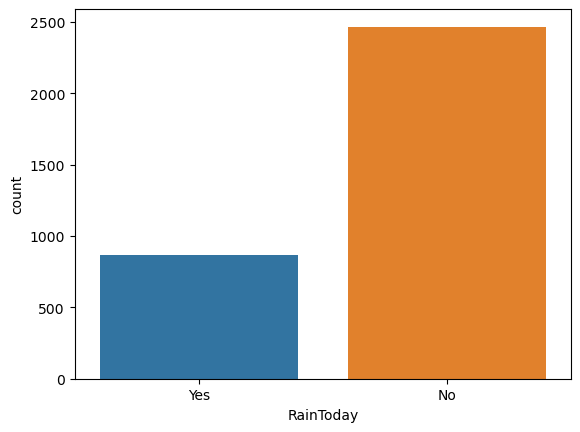

In [6]:
sns.countplot(x="RainToday",data=df)

In [7]:
df["RainToday"].fillna("No",inplace=True)

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [9]:
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"],drop_first = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   uint8  
 14  RainTomorrow_Yes  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


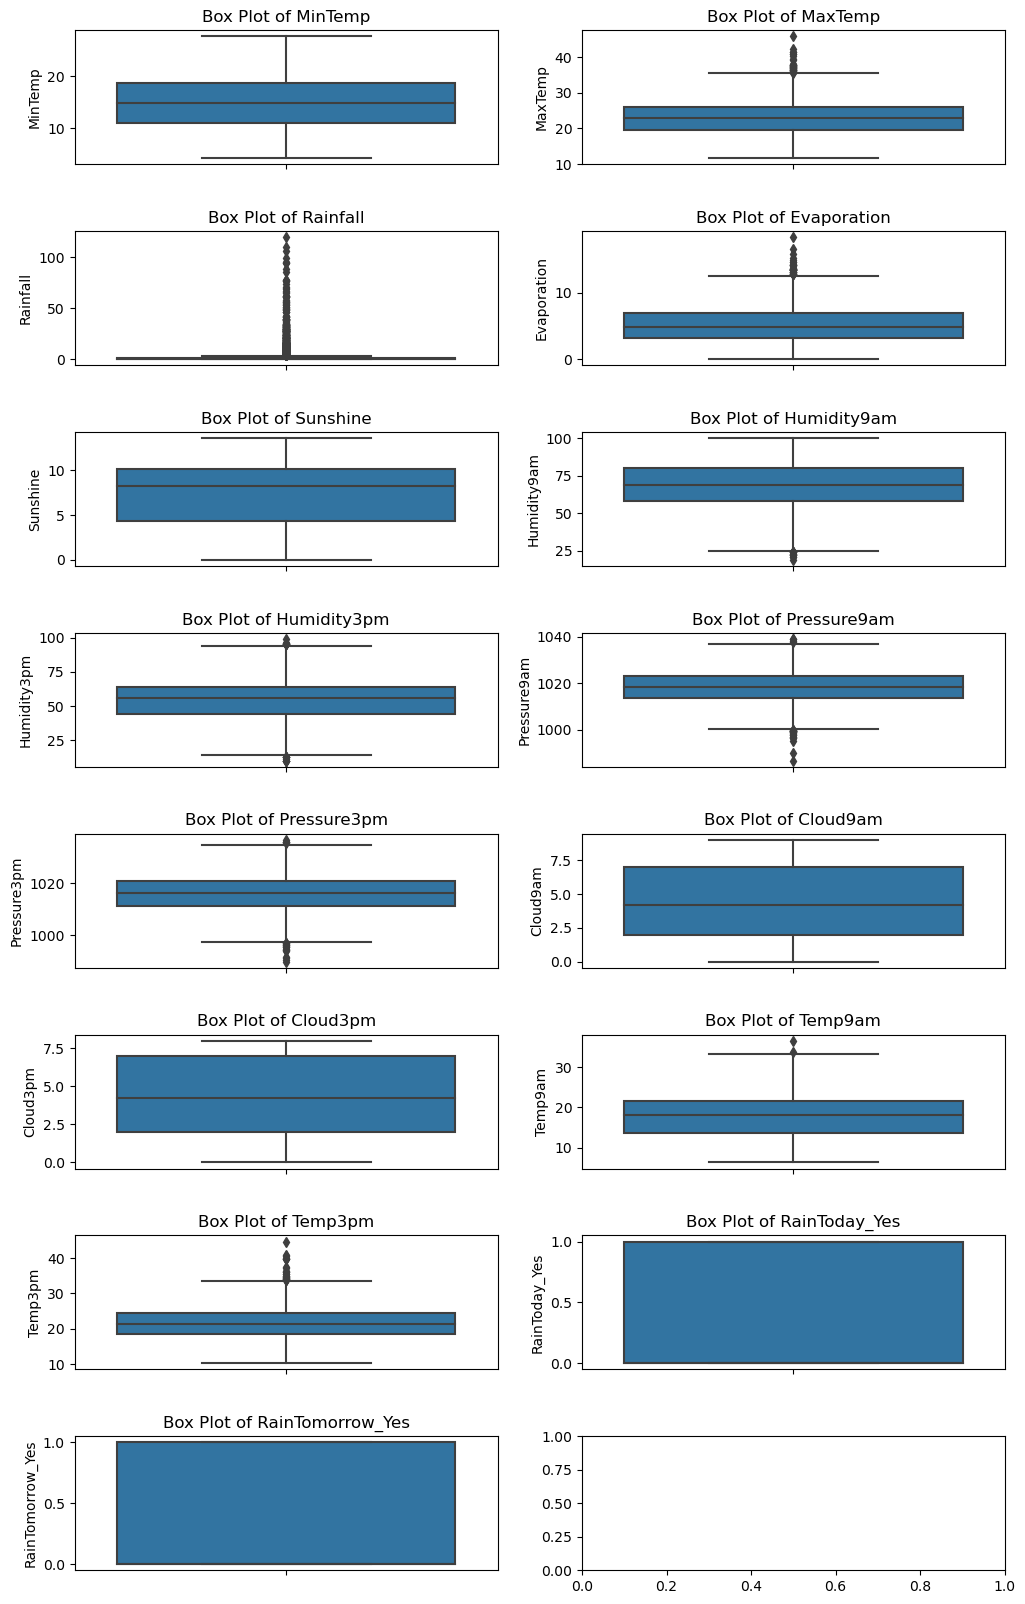

In [11]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(df.columns):
    row = i // 2  
    col = i % 2   
    ax = axes[row, col]
    sns.boxplot(data=df, y=column, ax=ax, orient="v")
    ax.set_title(f'Box Plot of {column}')

plt.show()

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [13]:
df[(df.MaxTemp>np.percentile(df.MaxTemp,[99])[0])]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
358,24.8,40.9,0.000000,10.6,11.100000,55.00000,20.0,1004.8,1002.8,6.000000,2.00000,31.5,40.1,0,0
641,18.9,36.9,0.000000,6.2,11.000000,73.00000,18.0,1011.9,1006.6,6.000000,6.00000,24.0,36.3,0,0
660,21.2,40.4,0.000000,7.4,6.000000,75.00000,19.0,1005.0,1001.5,6.000000,7.00000,24.0,39.8,0,0
722,25.0,41.3,0.000000,13.4,5.600000,28.00000,17.0,1007.8,1005.4,5.000000,5.00000,31.9,39.9,0,1
742,23.9,37.8,0.000000,9.0,9.800000,71.00000,32.0,1008.7,1005.5,6.000000,7.00000,26.9,37.4,0,1
1095,25.1,37.5,0.000000,10.2,5.700000,58.00000,54.0,1011.0,1009.9,4.181523,4.21866,30.6,33.6,0,0
1097,24.2,41.5,0.000000,8.4,12.400000,46.00000,22.0,1010.0,1006.6,4.181523,4.21866,33.7,40.9,0,0
1098,27.6,35.6,0.000000,16.6,2.600000,56.00000,77.0,1012.7,1016.1,4.181523,4.21866,28.7,22.8,0,0
1349,19.8,37.2,0.000000,4.4,9.700000,68.22901,23.0,1009.5,1004.9,4.181523,4.21866,26.2,34.9,0,0
1739,20.9,42.3,0.000000,9.8,8.700000,52.00000,14.0,1005.8,999.1,6.000000,6.00000,27.3,39.8,0,0


In [14]:
df.MaxTemp[(df.MaxTemp>3*np.percentile(df.MaxTemp,[99])[0])] = 3*np.percentile(df.MaxTemp,[99])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\837251320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxTemp[(df.MaxTemp>3*np.percentile(df.MaxTemp,[99])[0])] = 3*np.percentile(df.MaxTemp,[99])[0]


In [15]:
df.Rainfall[(df.Rainfall>3*np.percentile(df.Rainfall,[99])[0])] = 3*np.percentile(df.Rainfall,[99])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\1785260697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall>3*np.percentile(df.Rainfall,[99])[0])] = 3*np.percentile(df.Rainfall,[99])[0]


In [16]:
df.Evaporation[(df.Evaporation>3*np.percentile(df.Evaporation,[99])[0])] = 3*np.percentile(df.Evaporation,[99])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\4015453120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Evaporation[(df.Evaporation>3*np.percentile(df.Evaporation,[99])[0])] = 3*np.percentile(df.Evaporation,[99])[0]


In [17]:
df.Humidity9am[(df.Humidity9am<np.percentile(df.Humidity9am,[1])[0])]=0.3*np.percentile(df.Humidity9am,[1])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\2493544586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity9am[(df.Humidity9am<np.percentile(df.Humidity9am,[1])[0])]=0.3*np.percentile(df.Humidity9am,[1])[0]


In [18]:
df.Humidity3pm[(df.Humidity3pm>3*np.percentile(df.Humidity3pm,[99])[0])] = 3*np.percentile(df.Humidity3pm,[99])[0]
df.Humidity3pm[(df.Humidity3pm<0.3*np.percentile(df.Humidity3pm,[1])[0])]=0.3*np.percentile(df.Humidity3pm,[1])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\1903345332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity3pm[(df.Humidity3pm>3*np.percentile(df.Humidity3pm,[99])[0])] = 3*np.percentile(df.Humidity3pm,[99])[0]
C:\Users\divya\AppData\Local\Temp\ipykernel_3332\1903345332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity3pm[(df.Humidity3pm<0.3*np.percentile(df.Humidity3pm,[1])[0])]=0.3*np.percentile(df.Humidity3pm,[1])[0]


In [19]:
df.Pressure9am[(df.Pressure9am>3*np.percentile(df.Pressure9am,[99])[0])] = 3*np.percentile(df.Pressure9am,[99])[0]
df.Pressure9am[(df.Pressure9am<0.3*np.percentile(df.Pressure9am,[1])[0])]=0.3*np.percentile(df.Pressure9am,[1])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\2009312622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pressure9am[(df.Pressure9am>3*np.percentile(df.Pressure9am,[99])[0])] = 3*np.percentile(df.Pressure9am,[99])[0]
C:\Users\divya\AppData\Local\Temp\ipykernel_3332\2009312622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pressure9am[(df.Pressure9am<0.3*np.percentile(df.Pressure9am,[1])[0])]=0.3*np.percentile(df.Pressure9am,[1])[0]


In [20]:
df.Pressure3pm[(df.Pressure3pm>3*np.percentile(df.Pressure3pm,[99])[0])] = 3*np.percentile(df.Pressure3pm,[99])[0]
df.Pressure3pm[(df.Pressure3pm<0.3*np.percentile(df.Pressure3pm,[1])[0])]=0.3*np.percentile(df.Pressure3pm,[1])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\3835715875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pressure3pm[(df.Pressure3pm>3*np.percentile(df.Pressure3pm,[99])[0])] = 3*np.percentile(df.Pressure3pm,[99])[0]
C:\Users\divya\AppData\Local\Temp\ipykernel_3332\3835715875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pressure3pm[(df.Pressure3pm<0.3*np.percentile(df.Pressure3pm,[1])[0])]=0.3*np.percentile(df.Pressure3pm,[1])[0]


In [21]:
df.Temp9am[(df.Temp9am>3*np.percentile(df.Temp9am,[99])[0])] = 3*np.percentile(df.Temp9am,[99])[0]
df.Temp3pm[(df.Temp3pm>3*np.percentile(df.Temp3pm,[99])[0])] = 3*np.percentile(df.Temp3pm,[99])[0]

C:\Users\divya\AppData\Local\Temp\ipykernel_3332\65985537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp9am[(df.Temp9am>3*np.percentile(df.Temp9am,[99])[0])] = 3*np.percentile(df.Temp9am,[99])[0]
C:\Users\divya\AppData\Local\Temp\ipykernel_3332\65985537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temp3pm[(df.Temp3pm>3*np.percentile(df.Temp3pm,[99])[0])] = 3*np.percentile(df.Temp3pm,[99])[0]


In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.073781,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.566189,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,9.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


## Prediction RainToday

In [23]:
x1 = df.loc[:, df.columns != "RainToday_Yes"]
y1 = df["RainToday_Yes"]

In [24]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [25]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image
import pydotplus

In [27]:
clftree1 = tree.DecisionTreeClassifier(max_depth=4)
clftree1.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=4)

In [30]:
confusion_matrix(y_train1, clftree1.predict(x_train1))

array([[1963,    1],
       [   0,  705]], dtype=int64)

In [31]:
accuracy_score(y_train1, clftree1.predict(x_train1))

0.9996253278381416

In [32]:
confusion_matrix(y_test1, clftree1.predict(x_test1))

array([[504,   3],
       [  0, 161]], dtype=int64)

In [33]:
accuracy_score(y_test1, clftree1.predict(x_test1))

0.9955089820359282

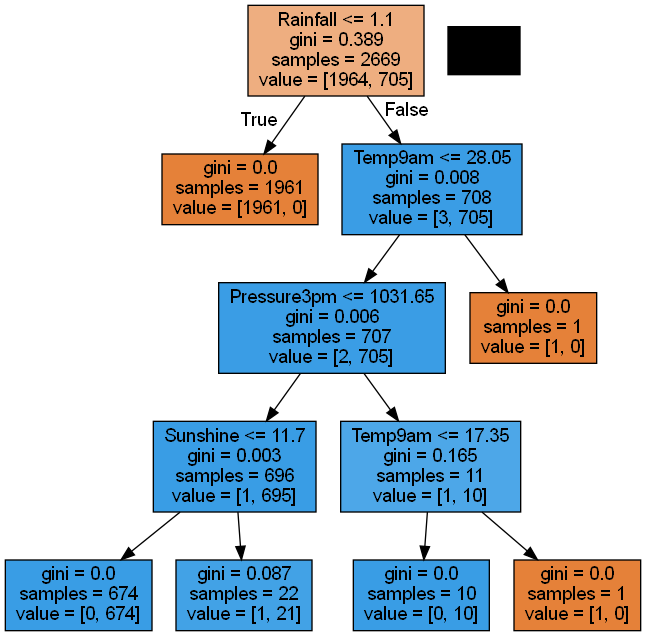

In [34]:
dot_data = tree.export_graphviz(clftree1, out_file = None, feature_names = x_train1.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier
clftree2 = tree.DecisionTreeClassifier()

In [36]:
bag_clf = BaggingClassifier(estimator=clftree2, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [37]:
bag_clf.fit(x_train1, y_train1)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [38]:
confusion_matrix(y_test1, bag_clf.predict(x_test1))

array([[504,   3],
       [  0, 161]], dtype=int64)

In [39]:
accuracy_score(y_test1, bag_clf.predict(x_test1))

0.9955089820359282

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [42]:
rf_clf.fit(x_train1, y_train1)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [43]:
confusion_matrix(y_test1, rf_clf.predict(x_test1))

array([[504,   3],
       [  0, 161]], dtype=int64)

In [44]:
accuracy_score(y_test1, rf_clf.predict(x_test1))

0.9955089820359282

In [45]:
from sklearn.model_selection import GridSearchCV
params_grid = {"max_features" : [4,5,7,8,9,10],
              "min_samples_split" : [2,3,10]}
grid_search = GridSearchCV(rf_clf, params_grid,
                          n_jobs=-1, cv=5, scoring="accuracy")

In [46]:
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [47]:
cvrf_clf = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [48]:
accuracy_score(y_test1, cvrf_clf.predict(x_test1))

0.9955089820359282

## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc_clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=1000, max_depth=1, random_state=42)
gbc_clf.fit(x_train1, y_train1)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, n_estimators=1000,
                           random_state=42)

In [52]:
accuracy_score(y_test1, gbc_clf.predict(x_test1))

1.0

## Ada Boost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
ada_clf = AdaBoostClassifier(learning_rate=0.06, n_estimators=1000, random_state=42)
ada_clf.fit(x_train1, y_train1)

AdaBoostClassifier(learning_rate=0.06, n_estimators=1000, random_state=42)

In [55]:
accuracy_score(y_test1, ada_clf.predict(x_test1))

1.0

## XG Boost

In [56]:
import xgboost as xgb

In [57]:
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate= 0.01, random_state=42)

In [58]:
param_test1 = {
    "max_depth": range(2,10,2),
    "gamma": [0.1,0.2,0.3],
    "subsample": [0.8,0.9],
    "colsample_bytree": [0.8,0.9],
    "reg_alpha": [1e-2,0.1,1]
}

In [59]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                          n_jobs=-1, cv=5, scoring="accuracy")

In [60]:
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(2, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [61]:
cvxg_clf=grid_search.best_estimator_

In [62]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 2,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [64]:
accuracy_score(y_test1, cvxg_clf.predict(x_test1))

0.9955089820359282

## Prediction RainTomorrow

In [65]:
x2 = df.loc[:, df.columns != "RainTomorrow_Yes"]
y2 = df["RainTomorrow_Yes"]

In [66]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [99]:
clftree3 = tree.DecisionTreeClassifier(max_depth=4)
clftree3.fit(x_train2, y_train2)

DecisionTreeClassifier(max_depth=4)

In [100]:
confusion_matrix(y_train2, clftree3.predict(x_train2))

array([[1879,   83],
       [ 344,  363]], dtype=int64)

In [101]:
accuracy_score(y_train2, clftree3.predict(x_train2))

0.8400149868864744

In [102]:
confusion_matrix(y_test2, clftree3.predict(x_test2))

array([[484,  26],
       [ 85,  73]], dtype=int64)

In [103]:
accuracy_score(y_test2, clftree3.predict(x_test2))

0.8338323353293413

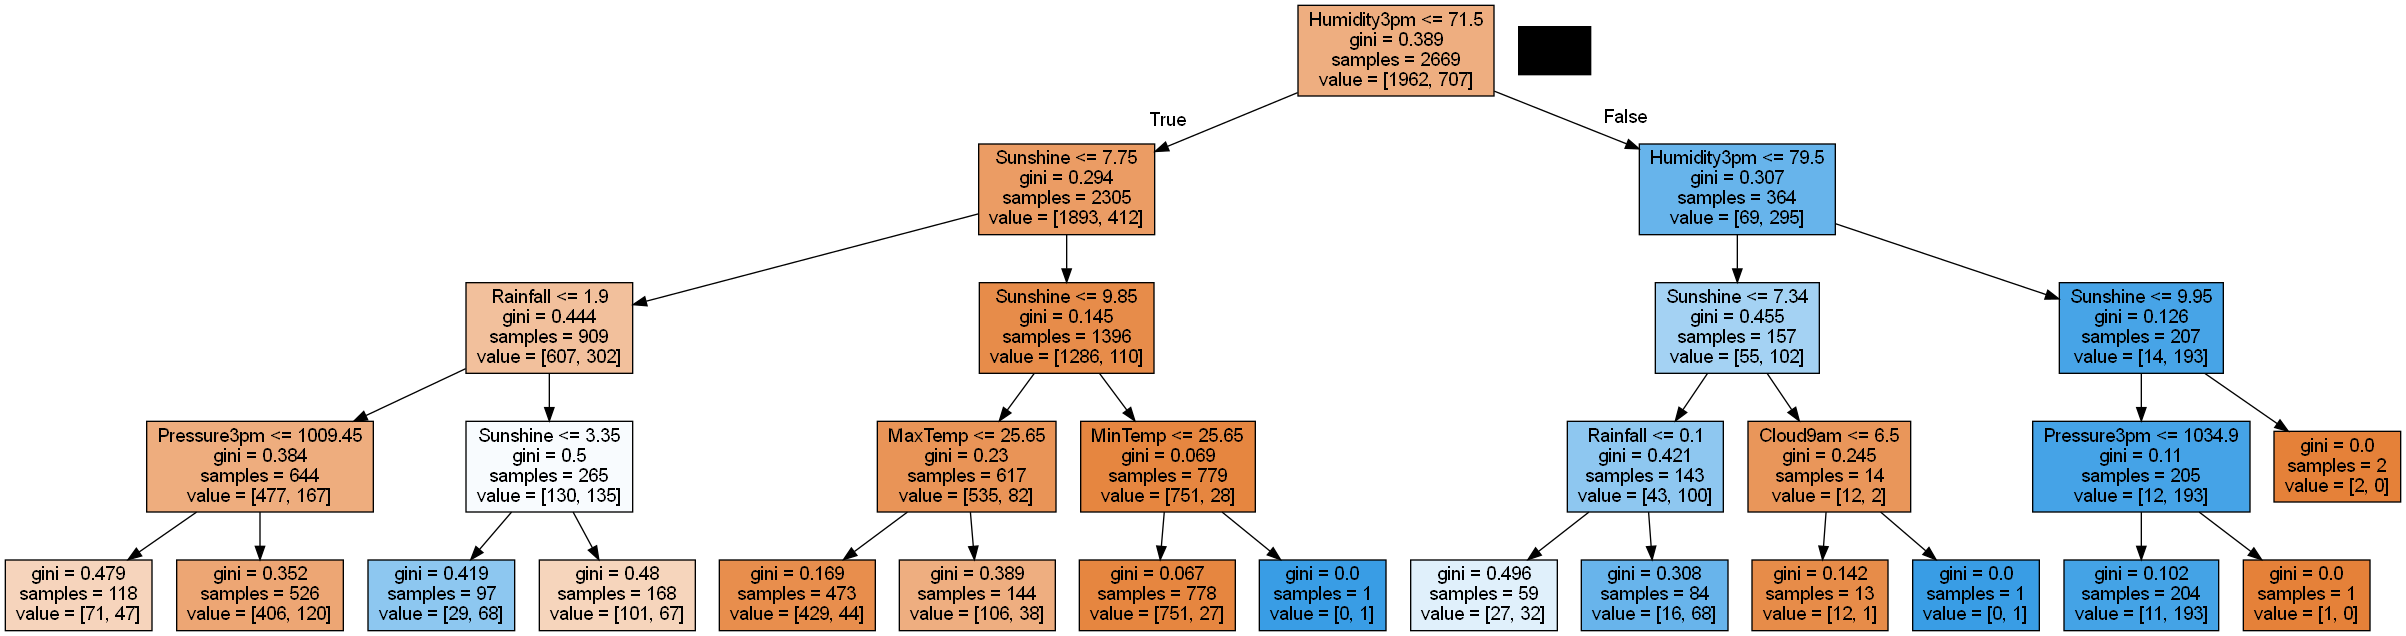

In [104]:
dot_data = tree.export_graphviz(clftree3, out_file = None, feature_names = x_train2.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Bagging

In [105]:
bag_clf = BaggingClassifier(estimator=clftree2, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [106]:
bag_clf.fit(x_train2,y_train2)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [107]:
confusion_matrix(y_test2, bag_clf.predict(x_test2))

array([[468,  42],
       [ 74,  84]], dtype=int64)

In [108]:
accuracy_score(y_test2, bag_clf.predict(x_test2))

0.8263473053892215

## Random Forest

In [155]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [156]:
rf_clf.fit(x_train2, y_train2)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [157]:
confusion_matrix(y_test2, rf_clf.predict(x_test2))

array([[480,  30],
       [ 77,  81]], dtype=int64)

In [158]:
accuracy_score(y_test2, rf_clf.predict(x_test2))

0.8398203592814372

In [159]:
grid_search.fit(x_train2,y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(2, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [226]:
confusion_matrix(y_test2, grid_search.best_estimator_.predict(x_test2))

array([[485,  25],
       [ 75,  83]], dtype=int64)

In [160]:
accuracy_score(y_test2, grid_search.best_estimator_.predict(x_test2))

0.8383233532934131

## Gradient Boosting

In [223]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, max_depth=1, random_state=42)
gbc_clf2.fit(x_train2,y_train2)

GradientBoostingClassifier(max_depth=1, n_estimators=1000, random_state=42)

In [225]:
confusion_matrix(y_test2, gbc_clf2.predict(x_test2))

array([[482,  28],
       [ 75,  83]], dtype=int64)

In [224]:
accuracy_score(y_test2, gbc_clf2.predict(x_test2))

0.8458083832335329

## Ada Booster

In [180]:
ada_clf2 = AdaBoostClassifier(learning_rate=0.05, n_estimators=1000, random_state=42)
ada_clf2.fit(x_train2, y_train2)

AdaBoostClassifier(learning_rate=0.05, n_estimators=1000, random_state=42)

In [212]:
confusion_matrix(y_test2, ada_clf2.predict(x_test2))

array([[482,  28],
       [ 75,  83]], dtype=int64)

In [181]:
accuracy_score(y_test2, ada_clf2.predict(x_test2))

0.8458083832335329

## XG Booster

In [206]:
xgb_clf2 = xgb.XGBClassifier(n_estimators=1000, learning_rate= 0.09, random_state=42)

In [207]:
grid_search = GridSearchCV(xgb_clf2, param_test1,
                          n_jobs=-1, cv=5, scoring="accuracy")

In [208]:
grid_search.fit(x_train2, y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.09,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(2, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [210]:
confusion_matrix(y_test2, grid_search.best_estimator_.predict(x_test2))

array([[485,  25],
       [ 75,  83]], dtype=int64)

In [209]:
accuracy_score(y_test2, grid_search.best_estimator_.predict(x_test2))

0.8502994011976048

## 1. Your views about the problem statement?

## 2. What will be your approach to solving this task?

## 3.What were the available ML model options you had to perform this task?

## 4. Which model’s performance is best and what could be the possible reason for that?

## 5. What steps can you take to improve this selected model’s performance even further?